In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from utilities_namespace import *

# Data for Drug-Disease associations

## Identifying indications and contraindications

In [2]:
from data_sources.drug_central import substances_for, all_names_for

/home/ubuntu/drug_repositioning/data_sources/drug_central.py:44: UserWarning: Already detected name {name} present.  using {newname}
  warnings.warn('Already detected name {name} present.  using {newname}')


In [3]:
from data_sources.drug_central import *

In [4]:
# OmopDoid.query.filter_by(struct_id=Structure.query.filter_by(name='doxorubicin').one().id).all()

In [5]:
show_source(substances_for)

In [6]:
breast_cancer_drugs = substances_for('%carcinoma%breast%', verbose=True)# | substances_for('%breast%carcinoma', verbose=True)
breast_cancer_drugs

Intersection with previous results doxorubicin
Intersection with previous results tamoxifen
{'Human epidermal growth factor 2 negative carcinoma of breast', 'HER2 Positive Carcinoma of Breast', 'HER2-positive carcinoma of breast', 'Infiltrating duct carcinoma of breast', 'Carcinoma of female breast', 'Carcinoma of breast'}


{'cyclophosphamide',
 'docetaxel',
 'doxorubicin',
 'epirubicin',
 'everolimus',
 'formestane',
 'ixabepilone',
 'lapatinib',
 'methotrexate',
 'neratinib',
 'paclitaxel',
 'palbociclib',
 'pertuzumab',
 'tamoxifen',
 'testolactone',
 'thiotepa',
 'trastuzumab',
 'trastuzumab emtansine',
 'vinblastine'}

In [7]:
contra = substances_for('%carcinoma%breast%', contra=True, verbose=True)# | substances_for('%breast%carcinoma%', contra=True, verbose=True)
contra

{'Carcinoma of female breast'}


{'acetophenazine',
 'alimemazine',
 'amitriptyline',
 'chlordiazepoxide',
 'chlorotrianisene',
 'chlorpromazine',
 'chlorprothixene',
 'colecalciferol',
 'danazol',
 'desogestrel',
 'dienestrol',
 'dienogest',
 'diethylstilbestrol',
 'drospirenone',
 'ergocalciferol',
 'estradiol',
 'estradiol cypionate',
 'estradiol valerate',
 'estrone',
 'ethinylestradiol',
 'etonogestrel',
 'etymemazine',
 'etynodiol',
 'ferrous fumarate',
 'fluoxetine',
 'fluoxymesterone',
 'fluphenazine',
 'fluphenazine decanoate',
 'fluphenazine enanthate',
 'haloperidol',
 'haloperidol decanoate',
 'hydroxyprogesterone caproate',
 'iloperidone',
 'isopropamide',
 'levomefolic acid',
 'levomepromazine',
 'levonorgestrel',
 'loxapine',
 'magnesium oxide',
 'medroxyprogesterone',
 'meprobamate',
 'mestranol',
 'methyltestosterone',
 'molindone',
 'norelgestromin',
 'norethindrone acetate',
 'norethisterone',
 'norgestimate',
 'olanzapine',
 'oxymesterone',
 'oxymetholone',
 'paliperidone',
 'paliperidone palmitate

Intersection between indicated and contraindicated structures should be empty:

In [8]:
assert not breast_cancer_drugs & contra

And I want to see if there are any synonymous names so I could increase my chances of finding corresponding substances in connectvity map:

In [9]:
breast_cancer_drugs_with_synonyms = all_names_for(*breast_cancer_drugs)
breast_cancer_contra_with_synonyms = all_names_for(*contra)

In [10]:
len(breast_cancer_drugs_with_synonyms) - len(breast_cancer_drugs)

114

In [11]:
len(breast_cancer_contra_with_synonyms) - len(contra)

355

As expected, there are many synonyms for both indications and contraindications, hence these will be included in the analysis.

## Signatues retrieval

### Perturbagens signatures from LINCS DrugConnectivityMap

In [12]:
from data_sources.drug_connectivity_map import DrugConnectivityMap
dcm = DrugConnectivityMap()

In [13]:
all_control_signatures = dcm.from_ids(dcm.all_controls(consensus=True).sig_id)

In [14]:
dcm.identify_substances(all_control_signatures)

{'DMSO',
 'EMPTY_VECTOR',
 'GFP',
 'H2O',
 'HcRed',
 'LUCIFERASE',
 'RFP',
 'UnTrt',
 'eGFP',
 'lacZ',
 'pgw'}

#### Possible improvements:

I could improve results here by inclusion of the controls with single repeats (so with no consensus). There are three such signatures:

In [15]:
dcm.identify_substances(dcm.from_ids(dcm.all_controls(consensus=False).sig_id)) - dcm.identify_substances(all_control_signatures)

{'BFP', 'PBS', 'plko.1'}

In [16]:
indications_singatures = dcm.from_perturbations(breast_cancer_drugs, synonyms_source=all_names_for)

Got perturbations for 14/19 or 73.68% of substances. No matches for: {'ixabepilone', 'trastuzumab', 'trastuzumab emtansine', 'testolactone', 'pertuzumab'}.


In [17]:
indications_singatures

,CPC005_A375_24H:BRD-K04210847-001-01-1:10,CPC005_A549_24H:BRD-K04210847-001-01-1:10,CPC003_HA1E_6H:BRD-K92093830-003-05-0:10,CPC004_HA1E_6H:BRD-K04548931-003-05-8:10,CPC004_HA1E_6H:BRD-A28746609-001-05-7:10,...,HOG002_MCF7_6H:BRD-K92093830-003-18-3:10,AML001_PC3_6H:BRD-K93754473:13.4584,CPC006_RKO_6H:BRD-K93754473-001-06-0:28.39,CPC006_RKO_6H:BRD-K85606544-001-01-8:10,AML001_U937_6H:BRD-K93754473:1.49538
b'5720',0.638332,0.024402,0.35770,1.182945,-0.064459,...,0.712387,-0.906070,-1.40410,-0.28065,0.177119
b'466',-1.551383,-0.086900,-2.83740,-4.941642,-0.316980,...,-1.912566,-3.993970,-1.92245,0.33815,0.021499
b'6009',0.374623,-0.354991,-0.24645,-1.438536,0.989167,...,-1.773798,-0.489703,0.72065,-0.57330,0.701487
b'2309',0.338569,1.213252,-1.47960,-5.443298,-0.495990,...,-5.243472,0.335352,0.29805,0.67050,0.901494
b'387',-1.675559,-1.565093,0.45065,0.530031,-0.483692,...,1.465490,0.779005,-0.47355,0.50770,-1.274575
...,...,...,...,...,...,...,...,...,...,...,...
b'25960',0.505869,0.156342,1.05415,3.205578,-0.502983,...,1.864568,0.203565,1.20400,-0.26835,0.382246
b'6376',0.194066,-1.216984,-0.43530,1.221376,0.010126,...,0.241738,0.935042,-0.19080,-0.25740,0.815131
b'11033',0.008947,0.787951,1.02445,2.453247,-0.251104,...,1.948298,-0.419207,0.83390,0.05150,0.258115
b'54869',0.807878,0.470132,-0.62170,1.041493,-0.040599,...,-0.177436,0.842557,1.52295,-0.65940,-0.508901


In [18]:
# a minimal test to prevent the bug from version 1
assert indications_singatures['CPC015_MCF7_6H:BRD-K09631521-001-05-7:10'][b'5720'] == 0.11370185017585754

In [19]:
dcm.identify_substances(indications_singatures)

{'cyclophosphamide',
 'docetaxel',
 'doxorubicin',
 'epirubicin',
 'everolimus',
 'formestane',
 'lapatinib',
 'methotrexate',
 'neratinib',
 'paclitaxel',
 'palbociclib',
 'tamoxifen',
 'thiotepa',
 'vinblastine'}

In [20]:
contraindications_singatures = dcm.from_perturbations(contra, synonyms_source=all_names_for)

Didn't find anything for phytomenadione, but got matches for synonym phylloquinone.
Didn't find anything for etynodiol, but got matches for synonym ethynodiol.
Following substances were inferred indirectly: {'ethynodiol', 'phylloquinone'}
Got perturbations for 41/73 or 56.16% of substances. No matches for: {'perazine', 'levomefolic acid', 'desogestrel', 'estradiol valerate', 'haloperidol decanoate', 'phytomenadione', 'etynodiol', 'etonogestrel', 'paliperidone', 'drospirenone', 'oxymesterone', 'testosterone enantate', 'methyltestosterone', 'hydroxyprogesterone caproate', 'colecalciferol', 'ergocalciferol', 'estradiol cypionate', 'norethindrone acetate', 'paliperidone palmitate', 'acetophenazine', 'testosterone cypionate', 'ferrous fumarate', 'dienogest', 'isopropamide', 'norelgestromin', 'tranexamic acid', 'fluphenazine enanthate', 'propiomazine', 'fluphenazine decanoate', 'magnesium oxide', 'meprobamate', 'etymemazine', 'pecazine', 'quinestrol'}.


In [21]:
dcm.identify_substances(contraindications_singatures.columns)

{'alimemazine',
 'amitriptyline',
 'chlordiazepoxide',
 'chlorotrianisene',
 'chlorpromazine',
 'chlorprothixene',
 'danazol',
 'dienestrol',
 'diethylstilbestrol',
 'estradiol',
 'estrone',
 'ethinylestradiol',
 'ethynodiol',
 'fluoxetine',
 'fluoxymesterone',
 'fluphenazine',
 'haloperidol',
 'iloperidone',
 'levomepromazine',
 'levonorgestrel',
 'loxapine',
 'medroxyprogesterone',
 'mestranol',
 'molindone',
 'norethisterone',
 'norgestimate',
 'olanzapine',
 'oxymetholone',
 'perphenazine',
 'phylloquinone',
 'pimozide',
 'prochlorperazine',
 'progesterone',
 'promazine',
 'quetiapine',
 'risperidone',
 'testosterone',
 'thiothixene',
 'trifluoperazine',
 'triflupromazine',
 'ziprasidone'}

Again, I hope that there is no intersection:

In [22]:
assert not set(contraindications_singatures.columns) & set(indications_singatures.columns)

### Disease signature - Invasive Breast Carcinoma from TCGA

In [23]:
from data_sources.tcga import TCGA
tcga = TCGA()

As some genes have no HGNC identifier assigned, entrez ids were used instead.

In [24]:
brca_expression = tcga.expression('BRCA', index='entrez_gene_id')

Samples were divided into tumor and normal based on the information contained in the barcodes:

[<img src="https://image.ibb.co/ieXh4H/barcode.png">](https://www.biostars.org/p/312269/)

*Tumor types range from 01-09, normal types from 10-19 and control samples from 20-29.*

In [25]:
brca_expression.classes.value_counts()

tumor     1100
normal     112
dtype: int64

Differrential profile was created with signal-to-noise ratio metric.
All samples were used regardless whether there was corresponding normal sample or not (`only_paired=False`),

In [26]:
brca_expression.barcodes.apply(lambda barcode: barcode.sample).value_counts()

01    1093
11     112
06       7
dtype: int64

gdc.cancer.gov/resources-tcga-users/tcga-code-tables/sample-type-codes

As far as I understand, normal tissues (10-19, e.g. Blood Derived Normal, Solid Tissue Normal, Buccal Cell Normal, EBV Immortalized Normal, Bone Marrow Normal) come from the patient tissues while controls (20-29, e.g. Control Analyte, Recurrent Blood Derived Cancer - Peripheral Blood, Cell Lines, Primary Xenograft Tissue) encompass less patient-specific controls like cell lines - though I did not find too much of discussion on this. Here is [the full table with sample types](gdc.cancer.gov/resources-tcga-users/tcga-code-tables/sample-type-codes).
Fortunately, there is nothing to worry about as the BRCA data I am using includes only 01 (Primary Solid Tumor, 1093 samples), 06 (Metastatic, 7 samples) and 11 (Solid Tissue Normal, 112 samples). Again I might want to include metastatic drugs (or exclude metastatic samples).

In [27]:
query_signature = brca_expression.differential('tumor', 'normal', only_paired=False)

Metric: signal_to_noise, groups: tumor, normal
Using 1212 out of 1212 samples


In [28]:
query_signature

b'84820'       -0.099007
b'55233'        0.247522
b'5775'        -0.654732
b'8718'         0.113611
b'84627'        0.523797
                  ...   
b'100158262'   -0.008849
b'220963'      -0.084851
b'5598'        -0.058430
b'389434'       0.060694
b'4160'         0.035307
Length: 20531, dtype: float64

Below I generate quantile plots to asses the quality of the expression data (it seems ok to me; strangely the plots duplicated after saving the notebook, please ignore the duplicates):

In [29]:
from statsmodels.graphics.gofplots import qqplot_2samples

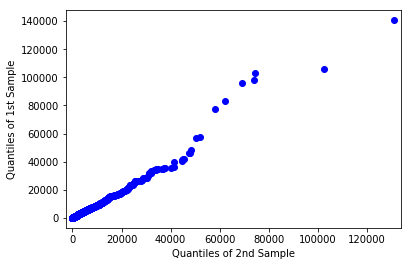

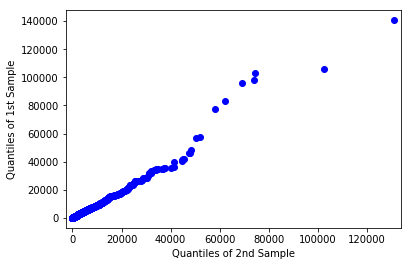

In [30]:
qqplot_2samples(
    brca_expression.by_sample_type('tumor').mean(axis=1),
    brca_expression.by_sample_type('normal').mean(axis=1),
)

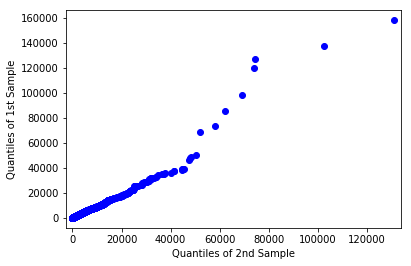

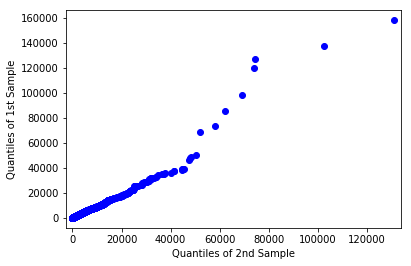

In [31]:
qqplot_2samples(
    brca_expression.by_sample_type('tumor', paired_against='normal').mean(axis=1),
    brca_expression.by_sample_type('normal', paired_against='tumor').mean(axis=1),
)

## Input for signature scoring with early aggregation 

Some of the limma and GSVA scoring functions are designed to take multiple replicates of analyzed samples (cases) with multiple controls. Those methods require different type of input.

For Drug Connectivity Map this was achieved by aggregating samples by a substance (ignoring the fact that samples coming from different cell lines might influence the result in a meaningful way) and using empty vectors (and other inert substances) as controls.

For TCGA data it was natural to use raw sampels data.

In [32]:
from signature_scoring.models import TCGAExpressionWithControls, SubstancesCollectionWithControls

In [33]:
brca_with_controls = TCGAExpressionWithControls(brca_expression)
brca_with_controls.index = brca_with_controls.index.astype(bytes)

In [34]:
repr(brca_with_controls)

'<TCGAExpressionWithControls: 1100 cases, 112 controls>'

In [35]:
indications_with_controls = SubstancesCollectionWithControls.from_signatures(indications_singatures)